In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
RANDOM_STATE = 42

In [2]:
pd.set_option('display.max_columns', None)


In [84]:
df = pd.read_csv('train.csv')
df = df.drop(columns=['ID','arrival_date_year','arrival_date_month','reservation_status', 'agent', 'company', 'reservation_status_date'])
df.dropna(subset=['children'], inplace=True)
df['country']=df['country'].fillna(df['country'].value_counts().index[0])
df['children'] = df['children'].astype(int)   
df['hotel'] = np.where(df['hotel']=='City Hotel',1,0)
df['status_minus_arrival_date'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
#df = pd.get_dummies(df, columns=[ 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type','country'])
df.sample()
df.country = df.country.astype("category").cat.codes
df.meal = df.meal.astype("category").cat.codes
df.market_segment = df.market_segment.astype("category").cat.codes
df.distribution_channel = df.distribution_channel.astype("category").cat.codes
df.reserved_room_type = df.reserved_room_type.astype("category").cat.codes
df.assigned_room_type = df.assigned_room_type.astype("category").cat.codes
df.deposit_type = df.deposit_type.astype("category").cat.codes
df.customer_type = df.customer_type.astype("category").cat.codes
x = df.drop(columns=['adr'])
y = df['adr']
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=42)

In [149]:
len(x_train.columns)

26

In [103]:
y_train.values

array([150.71280566, 154.01320003, 106.18976719, ...,  33.14526144,
       117.8646134 ,  67.83535718])

In [104]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
y_train = np.reshape(y_train.values,(-1,1))
y_val = np.reshape(y_val.values,(-1,1))
print(scaler_x.fit(x_train))
xtrain_scaler = scaler_x.transform(x_train)
print(scaler_x.fit(x_val))
xval_scaler = scaler_x.transform(x_val)
print(scaler_y.fit(y_train))
ytrain_scaler = scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scaler = scaler_y.transform(y_val)

StandardScaler()
StandardScaler()
StandardScaler()
StandardScaler()


In [105]:
ytrain_scaler

array([[ 1.26421433],
       [ 1.32734665],
       [ 0.41254559],
       ...,
       [-0.98470233],
       [ 0.63587045],
       [-0.32112519]])

In [106]:
yval_scaler

array([[ 0.32596121],
       [-1.02380669],
       [-0.63852652],
       ...,
       [-1.62179615],
       [ 1.20632801],
       [-0.21012744]])

In [107]:
xtrain_scaler

array([[ 0.7202746 , -0.2602869 ,  0.65294929, ..., -0.2629512 ,
        -0.68772096, -0.52149141],
       [-1.38835939, -0.8201925 ,  0.12071035, ...,  3.76523119,
        -0.68772096,  0.64266397],
       [ 0.7202746 , -0.45008541, -1.74212595, ..., -0.2629512 ,
        -0.68772096, -0.13343962],
       ...,
       [-1.38835939, -0.88662198,  1.51783758, ..., -0.2629512 ,
         0.61678056, -0.90954321],
       [-1.38835939, -0.62090407,  0.05418048, ..., -0.2629512 ,
        -0.68772096,  1.41876756],
       [-1.38835939, -0.82968243,  0.98559863, ..., -0.2629512 ,
        -0.68772096, -0.13343962]])

In [108]:
xval_scaler

array([[ 0.72496094, -0.14079114, -1.14843643, ..., -0.25575182,
         0.61180264, -0.13454166],
       [ 0.72496094,  1.96910407,  0.38932802, ..., -0.25575182,
         0.61180264,  0.61423185],
       [ 0.72496094, -0.60440041,  1.65965518, ..., -0.25575182,
         0.61180264,  0.98861861],
       ...,
       [ 0.72496094, -0.89770422, -0.74728049, ..., -0.25575182,
         1.91819195, -0.88331518],
       [ 0.72496094, -0.6706303 , -0.41298387, ..., -0.25575182,
         1.91819195, -0.13454166],
       [ 0.72496094, -0.73686019, -1.41587373, ..., -0.25575182,
        -0.69458668,  0.2398451 ]])

In [109]:
xtrain_scaler.shape

(68645, 25)

In [137]:
model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(689,input_shape=(25,),activation='relu'))
#model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(689,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(1,activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 689)               17914     
_________________________________________________________________
dense_20 (Dense)             (None, 689)               475410    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 690       
Total params: 494,014
Trainable params: 494,014
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [139]:
history = model.fit(xtrain_scaler,ytrain_scaler,epochs=30,batch_size=150,verbose=1,
                    validation_split=0.2)
predictions = model.predict(xval_scaler)


Epoch 1/30
367/367 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
367/367 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/30
367/367 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/30
367/367 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/30
367/367 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/30
367/367 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/30
367/367 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


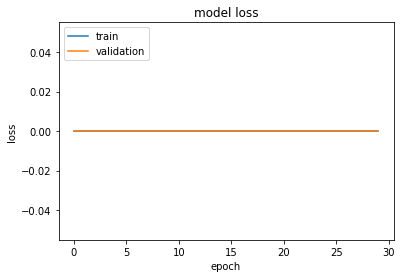

In [140]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, predictions)

9380.826841214883

In [143]:
print(model.evaluate(xtrain_scaler,ytrain_scaler,verbose=1))
print(model.evaluate(xval_scaler,yval_scaler,verbose=1))

2146/2146 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]
716/716 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


# ---------------

In [186]:
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import statsmodels.api as sm
import statsmodels.formula.api as smf

In [187]:
train_df = pd.read_csv('train.csv')
train_df.head()


,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03


In [188]:
train_df.sample()
train_df.country = train_df.country.astype("category").cat.codes
train_df.market_segment = train_df.market_segment.astype("category").cat.codes
train_df.deposit_type = train_df.deposit_type.astype("category").cat.codes
train_df.customer_type = train_df.customer_type.astype("category").cat.codes

In [189]:
x1 = np.column_stack((train_df.is_canceled,train_df.country,train_df.market_segment
                      ,train_df.deposit_type,train_df.customer_type,train_df.required_car_parking_spaces,
                      train_df.arrival_date_week_number))
x1.shape


(91531, 7)

In [190]:
x1 = sm.add_constant(x1, prepend=True)
x1.shape

(91531, 8)

In [191]:
y1 = np.array(train_df.adr)
y1

array([-6.30516084, 75.05222697, 74.54640111, ..., 90.81455355,
       38.1355651 , 58.19647044])

In [192]:
x_train, x_val, y_train, y_val = train_test_split(x1,y1,random_state = 45)

In [219]:
y_train = np.reshape(y_train,(-1,1))
y_val = np.reshape(y_val,(-1,1))
scaler_x = StandardScaler()
scaler_y = StandardScaler()

xtrain_scaler = scaler_x.fit_transform(x_train)

xval_scaler = scaler_x.transform(x_val)

ytrain_scaler = scaler_y.fit_transform(y_train)

yval_scaler = scaler_y.transform(y_val)


In [220]:
ytrain_scaler

array([[-0.27981206],
       [ 0.72653116],
       [-0.11400764],
       ...,
       [-0.48682887],
       [ 0.31340348],
       [-0.56668708]])

In [221]:
yval_scaler

array([[ 0.52908007],
       [-0.16130889],
       [-1.39596649],
       ...,
       [-0.5740653 ],
       [ 2.68983064],
       [ 0.14592341]])

In [222]:
xtrain_scaler

array([[ 0.        , -0.74601481, -0.28063624, ..., -0.2501058 ,
         3.75648465, -1.1466253 ],
       [ 0.        , -0.74601481, -0.8698113 , ..., -0.2501058 ,
        -0.26032493, -1.47941887],
       [ 0.        , -0.74601481,  1.65873169, ..., -0.2501058 ,
         3.75648465, -1.41286016],
       ...,
       [ 0.        , -0.74601481, -0.96800715, ...,  1.39809073,
        -0.26032493,  0.45078384],
       [ 0.        , -0.74601481, -0.8698113 , ..., -0.2501058 ,
        -0.26032493,  0.78357742],
       [ 0.        ,  1.34045595,  0.8977139 , ..., -3.54649886,
        -0.26032493,  0.51734256]])

In [223]:
xval_scaler

array([[ 0.        , -0.74601481,  0.8977139 , ..., -0.2501058 ,
        -0.26032493,  0.31766642],
       [ 0.        ,  1.34045595,  0.8977139 , ..., -0.2501058 ,
        -0.26032493, -1.01350787],
       [ 0.        , -0.74601481,  0.8977139 , ..., -0.2501058 ,
        -0.26032493,  1.11637099],
       ...,
       [ 0.        ,  1.34045595,  0.8977139 , ...,  1.39809073,
        -0.26032493, -0.6807143 ],
       [ 0.        , -0.74601481,  0.8977139 , ..., -3.54649886,
        -0.26032493,  0.78357742],
       [ 0.        ,  1.34045595,  0.8977139 , ..., -0.2501058 ,
        -0.26032493,  0.98325356]])

In [224]:
model = Sequential()
model.add(Dense(8,input_dim=8,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2670,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1,activation='linear'))
model.add(Dropout(0.8))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 2670)              24030     
_________________________________________________________________
dropout_16 (Dropout)         (None, 2670)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 2671      
_________________________________________________________________
dropout_17 (Dropout)         (None, 1)                 0         
Total params: 26,773
Trainable params: 26,773
Non-trainable params: 0
_________________________________________________

In [225]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])
history=model.fit(xtrain_scaler,ytrain_scaler,epochs=30,batch_size=150,verbose=1,validation_split=0.2)
pred = model.predict(x_val)

Epoch 1/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8478 - mse: 0.8478 - mae: 0.7055 - val_loss: 1.5809 - val_mse: 1.5809 - val_mae: 0.7048
Epoch 2/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8475 - mse: 0.8475 - mae: 0.7044 - val_loss: 1.5742 - val_mse: 1.5742 - val_mae: 0.7007
Epoch 3/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8500 - mse: 0.8500 - mae: 0.7047 - val_loss: 1.5722 - val_mse: 1.5722 - val_mae: 0.6995
Epoch 4/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8474 - mse: 0.8474 - mae: 0.7028 - val_loss: 1.5747 - val_mse: 1.5747 - val_mae: 0.7005
Epoch 5/30
367/367 [==============================] - 1s 2ms/step - loss: 0.8511 - mse: 0.8511 - mae: 0.7048 - val_loss: 1.5718 - val_mse: 1.5718 - val_mae: 0.6998
Epoch 6/30
367/367 [==============================] - 1s 3ms/step - loss: 0.8523 - mse: 0.8523 - mae: 0.7049 - val_loss: 1.5739 - val_mse: 1.5739 - val_mae: 0.7015
Epoch 7/30
367/3

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


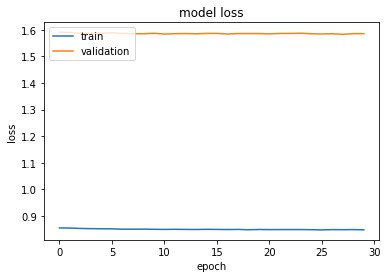

In [217]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

In [218]:
pred

array([[-0.07882533],
       [-0.00960088],
       [-0.40478408],
       ...,
       [-0.00960088],
       [-0.23100922],
       [-0.29948276]], dtype=float32)

In [53]:
prediction = scaler_y.inverse_transform(pred)
prediction

array([[-141.09352],
       [-141.21873],
       [-141.14128],
       ...,
       [-141.16666],
       [-141.05609],
       [-141.06238]], dtype=float32)

In [54]:
mean_absolute_error(y_val,prediction)

225.5231867055895

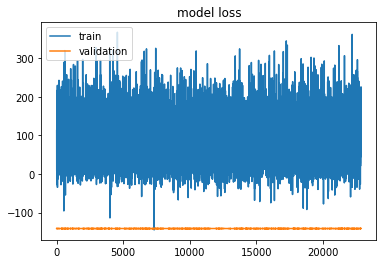

In [55]:
plt.plot(y_val)
plt.plot(prediction)
plt.title('model loss')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

In [87]:
train_df = pd.read_csv('train.csv')
train_df.columns


Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [89]:
train_df.is_canceled = np.where(train_df.is_canceled == 0,1,0)
train_df.is_canceled

0        1
1        1
2        1
3        1
4        1
        ..
91526    0
91527    1
91528    1
91529    1
91530    1
Name: is_canceled, Length: 91531, dtype: int64

In [91]:
final_score = train_df.adr * train_df.is_canceled * (train_df.stays_in_weekend_nights + train_df.stays_in_week_nights)
final_score


0         -0.000000
1        150.104454
2        149.092802
3        152.752575
4         98.823294
            ...    
91526      0.000000
91527    -13.644203
91528     90.814554
91529    381.355651
91530     58.196470
Length: 91531, dtype: float64

In [94]:
def format_lenght(date):
    return date[0]
train_df['arrival_date_full'] = train_df['arrival_date_year'].astype(str) + "-" + train_df['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + train_df['arrival_date_day_of_month'].astype(str)
train_df['arrival_date_full'] = pd.to_datetime(train_df['arrival_date_full'], format="%Y-%m-%d")

train_df['arrival_date_full']
final_ans = final_score.groupby(train_df.arrival_date_full).sum().astype(int)
final_ans.to_csv('Ans.csv')

In [95]:

import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

In [97]:
train_df = pd.read_csv('train.csv')
train_df.columns

Index(['ID', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [123]:
train_df = train_df.sort_values(['arrival_date_year','arrival_date_week_number'])
time = DataFrame(train_df, columns=['arrival_date_year','arrival_date_week_number'])
time

,arrival_date_year,arrival_date_week_number
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
91526,2017,13
91527,2017,13
91528,2017,13
91529,2017,13


In [124]:
time = time['arrival_date_year'].map(str) + time['arrival_date_week_number'].map(str)
time

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
91526    201713
91527    201713
91528    201713
91529    201713
91530    201713
Length: 91531, dtype: object

In [125]:
y = train_df.adr
y

0        -6.305161
1        75.052227
2        74.546401
3        76.376288
4        49.411647
           ...    
91526    79.223571
91527    -6.822102
91528    90.814554
91529    38.135565
91530    58.196470
Name: adr, Length: 91531, dtype: float64

In [135]:
df = DataFrame(time, columns=['FullDate'])
df = pd.concat([df,y],axis=1)
df2 = df.groupby('FullDate').agg("mean")
df2.sort_values(['FullDate'],ascending=True)

,adr
FullDate,
201527,70.864034
201528,78.238336
201529,88.446551
201530,86.492289
201531,102.008878
...,...
20175,66.133509
20176,70.074227
20177,76.010833


In [142]:
data = DataFrame(df2['adr'])
data = np.array(data)

In [149]:
train_size = int(len(data) * 0.8)
val_size = len(data) - train_size
train, val = data[0:train_size,:], data[train_size:len(data),:]
val

array([[ 72.79404684],
       [100.61980023],
       [ 64.38748635],
       [ 68.0491035 ],
       [ 70.32209519],
       [ 67.43628328],
       [ 76.12889178],
       [ 70.01701388],
       [ 76.10760056],
       [ 77.44344977],
       [ 77.72360182],
       [ 68.55953851],
       [ 67.54411231],
       [ 68.19398537],
       [ 66.13350938],
       [ 70.07422733],
       [ 76.01083303],
       [ 72.78768379],
       [ 73.54267408]])

In [145]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [152]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(train)
data_train

array([[0.24071067],
       [0.32350017],
       [0.43810532],
       [0.41616529],
       [0.59036626],
       [0.42404448],
       [0.55384733],
       [0.66071405],
       [0.46770768],
       [0.31536425],
       [0.35052668],
       [0.24010636],
       [0.63936174],
       [0.34809463],
       [0.27277845],
       [0.22083133],
       [0.26735224],
       [0.22308892],
       [0.09057161],
       [0.07799931],
       [0.        ],
       [0.08857531],
       [0.19088189],
       [0.18603801],
       [0.06333629],
       [0.11170213],
       [0.45374935],
       [0.44397267],
       [0.21949879],
       [0.18539971],
       [0.21076089],
       [0.46491343],
       [0.27817073],
       [0.30690348],
       [0.39506785],
       [0.36298835],
       [0.37889242],
       [0.37655511],
       [0.10335951],
       [0.37196794],
       [0.40060833],
       [0.46514671],
       [0.48710412],
       [0.56079281],
       [0.56420187],
       [0.43412876],
       [0.57865019],
       [0.657

In [153]:
data_val = scaler.fit_transform(val)
data_val

array([[0.23201832],
       [1.        ],
       [0.        ],
       [0.10105943],
       [0.16379326],
       [0.0841458 ],
       [0.32405895],
       [0.15537312],
       [0.32347131],
       [0.36034032],
       [0.36807242],
       [0.11514727],
       [0.08712184],
       [0.10505813],
       [0.04818966],
       [0.15695219],
       [0.32080056],
       [0.2318427 ],
       [0.25268018]])

In [180]:
lookback = 5
X_train, Y_train = create_dataset(data_train, lookback)
X_val, Y_val = create_dataset(data_val, lookback)

In [181]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))


In [182]:
X_train.shape[1]

1

Epoch 1/100
54/54 - 1s - loss: 0.1871 - val_loss: 0.0410
Epoch 2/100
54/54 - 0s - loss: 0.1055 - val_loss: 0.0166
Epoch 3/100
54/54 - 0s - loss: 0.0686 - val_loss: 0.0139
Epoch 4/100
54/54 - 0s - loss: 0.0527 - val_loss: 0.0203
Epoch 5/100
54/54 - 0s - loss: 0.0464 - val_loss: 0.0229
Epoch 6/100
54/54 - 0s - loss: 0.0432 - val_loss: 0.0293
Epoch 7/100
54/54 - 0s - loss: 0.0418 - val_loss: 0.0321
Epoch 8/100
54/54 - 0s - loss: 0.0398 - val_loss: 0.0292
Epoch 9/100
54/54 - 0s - loss: 0.0390 - val_loss: 0.0286
Epoch 10/100
54/54 - 0s - loss: 0.0380 - val_loss: 0.0313
Epoch 11/100
54/54 - 0s - loss: 0.0376 - val_loss: 0.0273
Epoch 12/100
54/54 - 0s - loss: 0.0357 - val_loss: 0.0310
Epoch 13/100
54/54 - 0s - loss: 0.0352 - val_loss: 0.0288
Epoch 14/100
54/54 - 0s - loss: 0.0342 - val_loss: 0.0310
Epoch 15/100
54/54 - 0s - loss: 0.0334 - val_loss: 0.0302
Epoch 16/100
54/54 - 0s - loss: 0.0328 - val_loss: 0.0300
Epoch 17/100
54/54 - 0s - loss: 0.0327 - val_loss: 0.0324
Epoch 18/100
54/54 - 0s

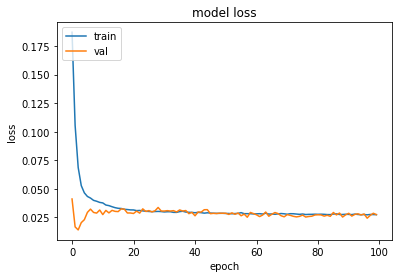

In [183]:
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [184]:
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [185]:
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred
predictions

array([[77.34904 ],
       [70.99594 ],
       [72.34072 ],
       [72.14207 ],
       [73.48344 ],
       [76.71235 ],
       [76.62707 ],
       [74.135124],
       [72.25053 ],
       [71.628494],
       [68.914055],
       [69.488716],
       [72.57512 ]], dtype=float32)

In [173]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 5.96 RMSE
Validation Score: 4.97 RMSE
